# Проект: Исследование стартапов

**Автор:** Семин Андрей Геннадьевич  
**Дата подготовки отчета:**  20.02.2025г.

## Введение

### Цель проекта:  
Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

### Описание проекта:  
Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.  
Исследование на этом наборе датасетов уже пытались проводить внутренними силами, но собственных аналитиков у компании нет и для решения задачи пригласили аутсорс-специалистов. Данные неполны, поэтому заказчик, кроме ответа на некоторые интересующие его вопросы, просит аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.

### Описание данных:   
Таблица **`acquisition`**. Содержит информацию о покупках одними компаниями других компаний:  
`id` — идентификатор покупки;  
`acquiring_company_id` — идентификатор покупающей компании;  
`acquired_company_id` — идентификатор покупаемой компании;  
`term_code` — варианты расчёта;  
`price_amount` — сумма сделки;  
`acquired_at` — дата сделки.    
  
Таблица **`company_and_rounds`**. Содержит информацию о компаниях и раундах финансирования:  
`company ID` — идентификатор компании;  
`name` — название компании;  
`category code` — категория области деятельности компании;  
`status` — статус компании;  
`founded at` — дата инвестирования;  
`closed at` — дата закрытия компании;  
`domain` — официальный сайт компании;  
`network username` — ник компании в сети;  
`country code` — код страны компании;  
`investment rounds` — число инвестиционных раундов;  
`funding rounds` — число раундов финансирования;  
`funding total` — сумма финансирования;  
`milestones` — вехи финансирования;  
`funding round id` — идентификатор этапа финансирования;  
`company id` — идентификатор компании;  
`funded at` — дата финансирования;  
`funding round type` — тип финансирования;  
`raised amount` — сумма финансирования;  
`pre money valuation` — предварительная денежная оценка;  
`participants` — число участников;  
`is first round` — является ли раунд первым;  
`is last round` — является раунд последним.    
  
Таблица **`education`**. Содержит информацию об образовании сотрудника:  
`id` — идентификатор записи об образовании;  
`person_id` — идентификатор работника;  
`instituition` — название учебного заведения;  
`graduated_at` — дата получения образования.    
  
Таблица **`people`**. Содержит информацию о сотрудниках:  
`id` — идентификатор сотрудника;  
`first_name` — имя сотрудника;  
`last_name` — фамилия сотрудника;  
`company_id` — идентификатор компании;  
`network_username` — ник в социальных сетях.    
  
Таблица **`degrees`**. Содержит информацию о типе образования сотрудника:  
`id` — идентификатор записи;  
`object_id` — идентификатор сотрудника;  
`degree_type` — тип образования;  
`subject` — специальность.    
  
Таблица **`fund`**. Содержит информацию о фондах:  
`id` — идентификатор фонда;  
`name` — название фонда;  
`category_code` — категория области деятельности компании;  
`founded_at` — дата создания фонда;  
`domain` — сайт фонда;  
`network_username` — ник фонда в сети;  
`country_code` — код страны фонда;  
`investment_rounds` — число инвестиционных раундов;  
`invested_companies` — число профинансированных компаний;  
`milestones` — вехи финансирования. 
  
Таблица **`investment`**. Содержит информацию о раундах инвестирования:  
`id` — идентификатор этапа инвестирования;  
`funding_round_id` — идентификатор раунда инвестирования;  
`company_id` — индентификатор компании;  
`funding_round_type` — тип финансирования;  
`fund_id` — идентификатор фонда.

### Задачи:  
1. Знакомоство с данным: загрузка и первичная предобработка:  
    - Вывод общей информации, исправление названия столбцов;
    - Смена типов и анализ пропусков;
2. Предобработка данных, предобработка данных, предварительное исследование.
    - Раунды финансирования по годам;
    - Люди и их образование;
    - Выбор данных для объединения;
    - Проверка пропусков и оценка причин их возникновения;
3. Исследовательский анализ объединенных таблиц: 
    - Объединение данных;
    - Анализ выбросов;
    - Исследование бесплатных компаний;
    - Цены стартапов по категориям;
    - Сколько раундов продержится стартап перед покупкой.
4. Итоговый вывод.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

In [152]:
!pip install phik

In [153]:
# Импортируем библиотеку для дальнейшей работы с датафреймами
import pandas as pd

# Импортируем библиотеку для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируем библиотек для расчета коэффициента корреляции
from phik import phik_matrix

In [154]:
# Загрузим все датасеты, которые необходимы для работы
acquisition  = pd.read_csv('acquisition.csv')
company_and_rounds = pd.read_csv('company_and_rounds.csv')
people = pd.read_csv('people.csv')
education = pd.read_csv('education.csv')
degrees = pd.read_csv('degrees.csv')
fund = pd.read_csv('fund.csv')
investement = pd.read_csv('investment.csv')

Рассмотрим данные, которые представлены в датафреймах по отдельности.

In [155]:
# Выведем первые 5 строк данных
display(acquisition.head(5))

# Выведем общую информацию о датафрейме
display(acquisition.info())

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

На основе первичного знакомства с данными из датафрейма `acquisition` можно сделать следующие заключения о данных:
- Размер датафрейма составляет 6 столбцов и 9407 строк;
- Название столбцов корректны для дальнейшего использования;
- Содержимое данных соответствует описанию;
- в данных присуствубт следующие типы: `int64` - 4 поля, `object` - 2 поля;
- Не все типы данных были установлены корректоно (например `acquired_at` содержит информацию о дате сделки, но при этом имеет тип object;
- В данных присуствуют пропуски по двум полям: term_code, acquired_at - следует оценить долю пропусков относительно всех данных, а также рассмотреть значения, которые присутствуют в столбцах.

In [156]:
# Выведем статистические показатели по числовым полям
acquisition['price_amount'].describe()

count    9.407000e+03
mean     3.932965e+08
std      2.682198e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.343200e+04
max      2.600000e+12
Name: price_amount, dtype: float64

Из статистических показателей заметно, что сумма сделки в среднем равна 3,93*10^8, но при этом медианное значение равно 0, что говорит о наличии выбросов. Учитывая специфику поля, то значение "0" должно являться таким выбросом, однако при условии что половина данных равна 0, то стоит более детально изучить информацию.

In [157]:
# Проверим долю содержания пропусков в таблице
acquisition.isna().sum() / acquisition.shape[0] * 100

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

Пропуски в поле `acquired_at` составляют 0.3% - маленькое значение, в случае необходимости обработки таких пропусков и дальнейшего анализа, данными можно пренебречь и удалить записи без них. В свою очередь в поле term_code содержится свыше 80% пропущенных значений. Необходимо проверить уникальные значения поля для предварительного решения о методе обработки пропусков.

In [158]:
acquisition['term_code'].value_counts()

cash              1195
cash_and_stock     427
stock              209
Name: term_code, dtype: int64

В поле присутсвуют только три варианта: cash, cash_and_stock и stock. Вероятнее всего они обазначат: денеги, деньги и акции, акции (соответственно). Остальные значения пусты. Предположить какие значения в них соддержится почти невозможно, поскольку пропуски в этих данных на первый взгляд не связаны с каким-то являнием или значением в переменных.

Перейдем к следующему датафрейму `company_and_rounds`.

In [159]:
# Выведем первые 5 строк данных
display(company_and_rounds.head(5))

# Выведем общую информацию о датафрейме
company_and_rounds.info()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

На основе первичного знакомства с данными из датафрейма `company_and_rounds` можно сделать следующие заключения о данных:
- Размер датафрейма составляет 22 столбца и 217774 строки;
- Название столбцов некорректны для дальнейшего использования и их следует заменить на название в стиле snake_case;
- Содержимое данных соответствует описанию;
- в данных присуствубт следующие типы: `float64` - 12 полей, `object` - 10 полей;
- Не все типы данных были установлены корректоно (например `copmany  ID` содержит информацию о ID компании, который представлен целым числом, но при этом имеет тип float64;
- В данных присуствуют пропуски по всем полям. Следует оценить долю пропусков относительно всех данных.

Также стоит рассмотреть уникальные значения в некоторых категориях, для оценки дубликатов в дальнейшем.

В первом приближении есть подозрение, что некторые столбцы дублируют данные (содержат одинаковые значения), причиной может быть объединение разных датасетов.


In [160]:
# Проверим предположение о том, что некоторые столбцы содержат одинаковые значения
df = company_and_rounds[['company  ID', 'company  id', 'investment  rounds', 'funding  rounds', 'funding  total', 'raised  amount']]
df.head(15)

,company ID,company id,investment rounds,funding rounds,funding total,raised amount
0,1.0,1.0,0.0,3.0,39750000.0,5250000.0
1,1.0,1.0,0.0,3.0,39750000.0,9500000.0
2,1.0,1.0,0.0,3.0,39750000.0,25000000.0
3,10.0,NaN,0.0,0.0,0.0,NaN
4,100.0,NaN,0.0,0.0,0.0,NaN
5,10000.0,NaN,0.0,0.0,0.0,NaN
6,10001.0,NaN,0.0,0.0,0.0,NaN
7,10002.0,NaN,0.0,0.0,0.0,NaN
8,10003.0,NaN,0.0,0.0,0.0,NaN
9,100042.0,NaN,0.0,0.0,0.0,NaN


In [161]:
# Теперь выведем конечный хвост датафрейма
df.tail(15)

,company ID,company id,investment rounds,funding rounds,funding total,raised amount
217759,NaN,277672.0,NaN,NaN,NaN,20000000.0
217760,NaN,276706.0,NaN,NaN,NaN,1500000.0
217761,NaN,278776.0,NaN,NaN,NaN,100000.0
217762,NaN,279804.0,NaN,NaN,NaN,0.0
217763,NaN,193962.0,NaN,NaN,NaN,2700000.0
217764,NaN,269728.0,NaN,NaN,NaN,5600000.0
217765,NaN,78698.0,NaN,NaN,NaN,15000000.0
217766,NaN,196289.0,NaN,NaN,NaN,925000.0
217767,NaN,282450.0,NaN,NaN,NaN,2600000.0
217768,NaN,146919.0,NaN,NaN,NaN,4900000.0


На основе рассмотрения информации можно заметить, что предположение оказалось ошибочным, однако. Остался вопрос по полям `company  ID` и `company  id`. Проверим именно их значения путем создания датасета, в который войдут все записи, где присутствует значение в одном из полей.

In [162]:
df = company_and_rounds[(company_and_rounds['company  ID'] > 0) |
                       (company_and_rounds['company  id'] > 0)]
df.shape[0]

217774

Получили, что во всех записях присутствует либо одни из столбцов либо оба (учитывая количество непустых значений). Таким образом, это доказывает, что производилось объединение датасетов, в которых присутсовало несколько пустых значений. Теперь отследим долю пропусков во всех столбцах.

In [163]:
company_and_rounds.isna().sum() / company_and_rounds.shape[0] * 100

company  ID               0.138676
name                      0.138676
category  code           33.928752
status                    0.138676
founded  at              49.509124
closed  at               98.416248
domain                   32.425818
network  username        56.131586
country  code            50.128574
investment  rounds        0.138676
funding  rounds           0.138676
funding  total            0.138676
milestones                0.138676
funding  round  id       75.695905
company  id              75.695905
funded  at               75.809784
funding  round  type     75.695905
raised  amount           75.695905
pre  money  valuation    75.695905
participants             75.695905
is  first  round         75.695905
is  last  round          75.695905
dtype: float64

Есть ряд полей, в которых процент пропуска не является большим и составляет всего 0.14%. К этим полям относятся `company  ID` `name`, `status`, `investment  rounds`, `funding  rounds`, `funding  total`, `milestones`. В других данных пропусков намного больше: `category  code`, `founded  at`, `closed  at`, `domain`, `network  username`, `country  code` - количество пропусков варируется от 32,43% до 98,42%. Отдельно стоит отметить поля `unding  round  id`, `company  id`, `funded  at`, `funding  round  type`, `raised  amount`, `pre  money  valuation`, `participants`, `is  first  round`, `is  last  round` - процент пропусков в них одинаков и составляет 75,7%, что также подтверждает теорию о том, что раньше это были разные датасеты и впоследствии их объединили в один.  Также рассмотрим статистические показатели по числовым полям.

In [164]:
display(company_and_rounds.describe())

,company ID,investment rounds,funding rounds,funding total,milestones,funding round id,company id,raised amount,pre money valuation,participants,is first round,is last round
count,217472.000000,217472.000000,217472.000000,2.174720e+05,217472.000000,52928.000000,52928.000000,5.292800e+04,5.292800e+04,52928.000000,52928.000000,52928.000000
mean,145287.383723,0.037711,0.612171,5.996191e+06,0.650442,28962.894536,98490.888433,7.946092e+06,3.294525e+05,1.528567,0.604576,0.604538
std,91998.156087,1.962712,1.433500,4.893160e+07,0.826408,16821.871803,88429.084864,4.216821e+07,6.531803e+07,2.060192,0.488946,0.488954
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,51960.750000,0.000000,0.000000,0.000000e+00,0.000000,14343.750000,26598.000000,2.463300e+05,0.000000e+00,0.000000,0.000000,0.000000
50%,165262.500000,0.000000,0.000000,0.000000e+00,0.000000,28885.500000,58080.000000,1.600000e+06,0.000000e+00,1.000000,1.000000,1.000000
75%,228199.250000,0.000000,0.000000,0.000000e+00,1.000000,43561.250000,171610.750000,6.700000e+06,0.000000e+00,2.000000,1.000000,1.000000
max,286215.000000,478.000000,15.000000,5.700000e+09,9.000000,57952.000000,286215.000000,3.835050e+09,1.500000e+10,36.000000,1.000000,1.000000


Рассмотрим каждое поле по отдельности:
- `company  ID` - поля индентификатора, информация о его статистических показателях не так важна, поскольку содержит просто уникальный номер компании в датасете;
- `investment  rounds` - среднее значение поля составляет 0.038, при этом в основном большинстве данных информация о раундах инвестирования представлена 0 (медиана и 75-процентиль), зафикисировано большое максимальное значение 478, которое можно расценить как выброс повлиявший на среднее;
- `finding  rounds` - среднее значение поля составляет 0.61, при этом в основном большинстве данных информация о раундах инвестирования представлена 0 (медиана и 75-процентиль), зафикисировано большое максимальное значение 15, которое можно расценить как выброс повлиявший на среднее;
- аналогичная ситуация складывается и в поле `funding  total` - среднее значение составляет 5966191, при медиане и 75-процентилем равным 0,  максимлаьное значение равно 5,7 млрд.;
- `milestones` - среднее значение составляет 0.65%, при медиане 0, в данном случае 75-процентиль составляет 1, что говорит о большем количестве проектом (стартапов), которые имеют хотя бы одну веху финансирования по сравнению с предыдущими полями, максимальное значение - 9;
- поля `funding  round  id`, `company  id` - индентификаторы, информация о их статистических показателях не так важна, поскольку содержит просто уникальный номер компании или финансовой операции в датасете;
- `raise  amount` - среднее значение составляет 7.946 млн., при значении медианаы 1.6 млн., это говорит о наличии выбросов или аномально больших значений, которые подтверждаются максимальным значением в поле 3.84 млрд, однако есть и значения равные 0;
- `participants` - среднее значение составляет 1.53, при медиане - 1, максимальное количество равно 36, среднее отклонение составляет 2.06, что говорит о большоим разбросе данных и наличии аномальных значений (учитывая что поле связано с количеством участников, то аномальные значения вполне нормальны, ведь стартапы в большинстве случаев реализуется малым коллективом или вовсе могут быть проданы сразу);
- поля `is  first  round`, `is  last  round` - бинарны и указывают на то, является ли раунд первым или последним, они не требует изучения статистчиеских показателей, однако можно заметить, что разница между ними есть, что говорит о том, что записей с указание последнего раунда в таблице на данный момент чуть больше.

In [165]:
# Рассмотрим датасет education
display(education.head())
education.info()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


На основе первичного знакомства с данными из датафрейма `education` можно сделать следующие заключения о данных:
- Размер датафрейма составляет 4 столбца и 109610 строк;
- Название столбцов корректны для дальнейшего использования;
- Содержимое данных соответствует описанию;
- в данных присуствубт следующие типы: `int64` - 2 поля, `object` - 2 поля;
- Не все типы данных были установлены корректоно (например `graduated_at` содержит информацию о дате получения образования, который представлен датой, но при этом имеет тип object;
- В данных присуствуют пропуски по полям `instituition`, `graduated_at`. Следует оценить долю пропусков относительно всех данных.

In [166]:
education.isna().sum() / education.shape[0] * 100

id               0.000000
person_id        0.000000
instituition     0.050178
graduated_at    47.035854
dtype: float64

Пропуски в поле `instituition` составляют всего 0.05%, данными можно принебречь, но следует проверить есть ли в строках информация о людях, которые вообще не получали образование (возможно пропуски - отсуствие образование).

В свою очередь, пропусков в поле `graduated_at` составляют 47%, так как после связано с датами, то причина возникновения пропусков может быть различна и никак не связано с данными в датафрейме. Возможные причина пропусков: сотрудник мог не закончить образование, в документах об образовании не было установлено даты. Стоит проверить количество уникальных значений сотрудников, возможно на одного человека приходится несколько образований.

In [167]:
education['person_id'].nunique()

68451

Препдположение о том, что человек мог внести в систему несколько документвов об образовании оказалось верным, так как в данных содержится информация о 68451 сотруднике, при этом записей в датасете намного больше.

In [168]:
# Проверим уникальные значения по полю instituition
education['instituition'].value_counts()

Stanford University                                     2990
Harvard Business School                                 1899
Harvard University                                      1581
University of California, Berkeley                      1476
Cornell University                                      1042
                                                        ... 
McMaster University in Ontario                             1
Stanford University Graduate School of Business  r         1
Bath University, England                                   1
Wymondham College                                          1
Certified Public Accountant in the state of Michigan       1
Name: instituition, Length: 21067, dtype: int64

Теория о том, что пропуски могут означать отсутсвие образования не опровергнута, так как в выведенем списке не присутствует записи, означающие отсутствие образования. Для дальнейшего анализа проверим другой датасет.

In [169]:
display(degrees.head())
degrees.info()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


На основе первичного знакомства с данными из датафрейма `degrees` можно сделать следующие заключения о данных:
- Размер датафрейма составляет 4 столбца и 109610 строк;
- Название столбцов корректны для дальнейшего использования;
- Содержимое данных соответствует описанию;
- в данных присуствубт следующие типы: `int64` - 1 поле, `object` - 3 поля;
- Все типы данных были установлены корректоно, однако в поле `object_id` запись начинается с `p:`, поэтому определен тип данных object, для дальнейшей работы необходимо избавиться  от начала и привести данные к единообразию.;
- В данных присуствуют пропуски по полям `degree_type`, `subject`. Следует оценить долю пропусков относительно всех данных.

In [170]:
degrees.isna().sum() / degrees.shape[0] * 100

id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64

Пропуски по полю `degree_type` составляют 10.23%, а пропуски по полю `subject` - 25.83%. Также следует оценить уникальные значения по полю `degree_type` т.к., данные можно отнести к категориальным.

In [171]:
degrees['degree_type'].value_counts()

BS                            23425
MBA                           15342
BA                            15342
MS                            11715
PhD                            4056
                              ...  
PgDip                             1
12th                              1
Dipl.-Eng.                        1
Hospitality Administration        1
MSC(CS)                           1
Name: degree_type, Length: 7148, dtype: int64

Количество уникальных записей в поле слишком велико для отнесения к категориальным и составляет 7148 записей. При этом, можно заметить, что в уникальных значения присуствуют не типичные категории образования, которые вероятнее всего можно отнести к сертификатам.

In [172]:
display(people.head())
people.info()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


На основе первичного знакомства с данными из датафрейма `people` можно сделать следующие заключения о данных:
- Размер датафрейма составляет 5 столбца и 226708 строк;
- Название столбцов корректны для дальнейшего использования;
- Содержимое данных соответствует описанию;
- в данных присуствуют следующие типы: `int64` - 1 поле, `object` - 3 поля, `float64` - 1 поле;
- Все типы данных были установлены корректно;
- В данных присуствуют пропуски почти по всем полям, кроме `id`. Следует оценить долю пропусков относительно всех данных.

In [173]:
people.isna().sum() / people.shape[0] * 100

id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64

Количество пропусков по полям `first_name`, `last_name` небольшое и составляет от 0.0004% до 0.002%. В полях `company_id`, `network_username` количество пропусков значительно больше и составляет от 82.86% до 84.73% от всех значений. Возможно пропуски в этих значениях говорят о том, что не все люди, которые перечилены в датасете работают в компаниях-стартапах. Для этого стоит просмотреть информацию о суммарном количестве сотрудников в компаниях, однако в представленных датасетах нет четкости в количестве людей, трудоустроенных в компаниях. Кроме того, стоит рассмотреть данные по именнам и фамилиям пользавателей, возможно присутвует люди "No name".

In [174]:
people[(people['first_name'].isna()) & (people['last_name'].isna())]

,id,first_name,last_name,company_id,network_username
207997,78517,NaN,NaN,29.0,NaN


Действительно в данных присуствует человек без имени и фамилии, однако он закреплен за компанией с ID 29, тем самым его не стоит убирать из датасета, так как будет потеряна часть информации, которая скажетя на анализе.

### Промежуточный вывод о качестве данных

В представленных данных содержится большое количество пропусков. Данные требует предобработки в разрезе названия столбцов, оптимизации типов данных (по возможности), удаления лишних данных (лишних столбцов), удаления дубликатов (при наличии), работы с пропусками (выбор методов обработки). 

Данные дополнительных датасетов не рассматривались и будут рассмотрены ситуационно при необходимости.

***P.S. Не данные а сказка, я бы даже сказал сказка в стиле хоррор...🙃***

### 1.2. Смена типов и анализ пропусков


In [175]:
# Приступим к обработке и оптимизации данных в датасете acquisition
# Повторно выведем информацию о максимальных значениях полей в датасете
acquisition.max()

id                              10529
acquiring_company_id           285984
acquired_company_id            286176
price_amount            2600000000000
dtype: int64

Можно произвести оптимизацию поля `id`. А также замнеить тип данных поля `acquired_at` на datetime.

In [176]:
acquisition['id'] = pd.to_numeric(acquisition['id'], downcast = 'integer')
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])

In [177]:
display(acquisition.head())
acquisition.info()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int64(3), object(1)
memory usage: 386.0+ KB


Данные датасета были оптимизированы и изменен тип данных, содержимое осталось неизменным. Присутствуют несколько записей, в которых дата сделки неизвестна, тем самым в дальнейшем их будет невозможно проанализировать в разрезе даты соверешния. Очистка данных будет произведена при необходимости. Количество пропусков небольшое и заполнить их невозможно, поэтому они будут удалены в случае необходимости. Также оценим наличие дубликатов по полям покупающей и покупаемой компании.

In [178]:
acquisition.duplicated(subset=['acquiring_company_id', 'acquired_company_id']).sum()

25

В данных присуствуют 25 дублирующих записей о покупке одной компании другой. Возможно компания продавалась частично, стоит также оценить количество дубликатов по дате.

In [179]:
acquisition.duplicated(subset=['acquiring_company_id', 'acquired_company_id','acquired_at']).sum()

12

Количество дубликатов с учетом даты составило 12, вероятнее всего это истинные дубликаты, от которых необходимо будет избавиться. Задумаемся об этом позже после полноценной проверки всех датасетов.

In [180]:
# Вновь выведем информацию по датасету company_and_rounds
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [181]:
# Дополнительно выведем информацию о максимальных значениях в столбцах
company_and_rounds.max()

company  ID              2.862150e+05
investment  rounds       4.780000e+02
funding  rounds          1.500000e+01
funding  total           5.700000e+09
milestones               9.000000e+00
funding  round  id       5.795200e+04
company  id              2.862150e+05
raised  amount           3.835050e+09
pre  money  valuation    1.500000e+10
participants             3.600000e+01
is  first  round         1.000000e+00
is  last  round          1.000000e+00
dtype: float64

Учитывая специфику данных к сожалению в данный момент оптимизацию данных произвести невозможно, поскольку все поля содержат пропуски и преобразовать значения в целочисленный тип данных нельзя.

Таким образом получится преобразовать только даты из типа `object` в тип `datetime64`.

Однако, для начала, следует переименовать столбцы с данными для удобства дальнейшей работы с ними.

In [182]:
# Заменим "  " на "_"
company_and_rounds.columns = company_and_rounds.columns.str.replace('  ','_')
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

Все названия столбцов датасета были заменены на аналогичные путем замены двух пробелов на нижнее подчеркивание. Теперь преобразуем типы данных для полей, содержащих информацию о дате.

In [183]:
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'])
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'])
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'])

In [184]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Как уже отмечалось ранее в данных присуствуют дубликаты из-за возможного раннего объединения предыдущих датасетов, в которых содержались данные. Однако, учитывая специфику заданий заказчика, чистка данных будет произведена позднее.

Рассмотрим максимальные значения в датасете `education` для анализа возможно ли оптимизировать типы данных.

In [185]:
education.max()

id           109610
person_id    268589
dtype: int64

Максимальное значение идентификатора составляет 109610, таким образом это поле можно изменить с `int64` на `int32`, чего не скажешь о поле индентификатора пользователя. Также, учитывая разницу между количеством уникальных записей об образовании сотрудников и количеством сотрудников, можно сделать вывод о том, что ранее сформированная гипотеза о пропусках в поле `instituition` связана с отсуствием образования не подтверждается поскольку количество уникальных сотрудников намного больше, что говорит о наличии сотрудников, незаполневших поля с образованием. Стоит взглянуть как сопоставляются данные в полях `instituition` и `gratuated_at` и  есть ли в них одновременные пропуски, тогда такие данные следует убрать.

In [186]:
# Первично преобразуем данные
education['id'] = pd.to_numeric(education['id'], downcast = 'integer')
education['graduated_at'] = pd.to_datetime(education['graduated_at'])
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int32         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.9+ MB


Тип данных преобразован, объем датасета изменился приблизительно на 0.4МВ.

In [187]:
# Проверим полнотсью пустые значения
education[(education['instituition'].isna()) & (education['graduated_at'].isna())]

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
160,161,7304,NaN,NaT
162,163,7306,NaN,NaT
271,272,7724,NaN,NaT
330,331,7914,NaN,NaT
603,604,9742,NaN,NaT
4424,4423,42511,NaN,NaT
9095,9087,69000,NaN,NaT
19198,19193,132950,NaN,NaT
23269,23265,160570,NaN,NaT


19 записей среди всего датафрейма не содержат информации о названии учебного заведения и дате, учитывая специфику данных стоит избавиться от этих данных, однако в дальнейшем по просьбе заказчика следует оценить полный датасет, поэтому его содержимое будет изменяться ситуационно.

Раннее знакомство с датасетом `people` показало, что работать с ним с точки зрения преобразования и оптимизации типов данных нет необходимости, все определенно корректно. В названии столбцов также все хорошо.

В датасете `degrees` присутсовало поле, которое требовало изменение содержимого ввиду хранения информации о идентификаторе пользователя в формате `p:номер id`, следует избавиться от конструкции и оставить только номера.

In [188]:
# Воспользуемся функцией srtip()
degrees['object_id'] = degrees['object_id'].str.strip(to_strip = 'p:')

In [189]:
# Проперим содержимое
degrees.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


Теперь можно приступить к смене типа данных в поле `object_id`.

In [190]:
degrees['object_id'] = pd.to_numeric(degrees['object_id'])

In [191]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  int64 
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Тип данных в столбце был успешно изменен с `object_id` на `int64`.

Таким образом были преобразованы все возможные типы данных столбцов на подходящие как с точки зрения дальнейшей работы с ними, так и с тчоки зрения оптимизации данных. Также были переименованы названия столбцов в датасете `company_and_rounds`. Кроме того, в столбце `object_id` датасета `degrees` были изменены значения с целью дальнейшей работы с данными.

Ранее уже рассматривалось количество пропусков в данных, однак повторим изучение по всем описанным выше датасетом для возобновления информации.

In [192]:
display(acquisition.isna().sum() / acquisition.shape[0] * 100)
display(company_and_rounds.isna().sum() / company_and_rounds.shape[0] * 100)
display(people.isna().sum() / people.shape[0] * 100)
display(education.isna().sum() / education.shape[0] * 100)
display(degrees.isna().sum() / degrees.shape[0] * 100)

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

company_ID              0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id             75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64

id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64

id               0.000000
person_id        0.000000
instituition     0.050178
graduated_at    47.035854
dtype: float64

id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64

По порядку:
- `acquisition` - количество пропусков в датасете небольшое, за исключением поля `term_code` (содержит информацию о способах расчета), учитывая задачи со стороны заказчика эти данные не потребуются для исследовательского анализа;
- `company_and_rounds` - больше половины столбцов имеют большое количество  пропущенных данных, предположения об их появлении были сделаны при рассмотрении и первичном изуучении данных, стоит учесть что из-за большого количества записей, данными все равно возможно пользоваться для проведения исследований заказчика (потребуется сформировать методику предобработки и реализовать ее). Самое большое количество пропусков представлено в поле `closed_at` (дата закрытия компании), однако наличие пропусков может быть объяснено тем, что еще не были закрыты (проверим и подумаем об этом чуть позже).
- `people` - датасет состоит из 5 полей, при этом 2 содержат минимальные пропуски и ими можно принебречь (причиной появления пропусков может являтся процесс заполнения данных: возможно поля были необязательны к заполнению или пропущены (потеряны) в процессе внесения данных). Другие два поля содержат колосальное количество пропусков, стоит отметить что значения количества не равны, поэтому здесь также трудно оценить причину их появления. Однако, можно предположить что не все сотрудники закреплены за компаниями, также как и в предыдущем случае ошибка может быть в том, что поля необязательны к заполнению. Так как мы не знаем процесса заполнения информации, сложно сделать более точныее выводы. Это может стать критической проблемой при проведении исследования.
- `education` - в целом данные почти полные, однако присуствуют пропуски в дате получения образования, возможно это поле по аналогии с другими датасетами было необязательно к заполнению и поэтому его пропускали (ведь важно не когда получили, а как хорошо используют знания и откуда такие ценные кадры появились) или же в документе об образовании не указано четкой даты получения и трудно сказать когда именно он сотрудник его получил.
- `degrees` - присутствуют пропуски в двух основных полях датасета (исключение идентификатор сотрудника), при этом данные также не сопоставимы по количеству (пропусков в типе образования меньше чем в специальности), аналогично предыдущим датасетам нам неизвестно как происходит заполнение данных, поэтому вероятнее всего появление пропусков заключается именно в нем. По задачам от заказчика данные из датасета не сильно важны, тем более учитывая количество уникальных значений в типе образования их сложно оценить и изучить по отдельности даже в случае среза. 

### Промежуточный вывод по разделу:

В ходе работы в рамках раздела были выполнены следующие задачи:
- изученины данные и проведена их первичная предобработка (замена типов данных, содержимого и названия столбцов);
- рассмотрены пропуски и их количество, выдвинуты гипотезы о их появлении;
- выдвинуты гипотезы о дубликатах и дублирующихся данных.


Отдельно обратим внимание на пропуски, не смотря на наличие большого количества пропусков в важных таблицах, возможность их дальнейшей обработки и анализа присутсвует, так как даже при отсуствии некоторых обязательных данных сохраняется большая выборка значений. Исключением является датасет `people`, большое количество пропущенных значений о идентификаторе компаний, к которой относится сотрудник, может привести к неправильным аналитическим выводам.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

Создадим сводную таблицу, в которой отразим год, типичный размер средств (медиану т.к., на основе рассмотрения данных было замечено, что среднее сильно отличается, тем самым говоря о выбросах и аномальных значения в данных, что исказит общую картину), а также количество раундов финансирования.

In [193]:
# Изначально построим сводную таблицу по всем данным

# Для этого потребуется создать поле с информацией о годе
company_and_rounds['year_funded'] =  pd.to_numeric(company_and_rounds['funded_at'].dt.year)

pivot_table = pd.pivot_table(company_and_rounds, index = 'year_funded', 
                            values = 'raised_amount',
                            aggfunc = ['median','count'],
                            fill_value = 0)
pivot_table.index = pd.to_numeric(pivot_table.index, downcast = 'integer')
display(pivot_table)

,median,count
,raised_amount,raised_amount
year_funded,,
1960,0,9
1973,0,1
1974,0,2
1984,41000,3
1985,0,1
1987,1250000,2
1989,15000,1
1990,1000000,1


Полученная сводная таблица демонстирует информацию о годах с 1960 по 2013 год (есть пропуски). Поле median raised_amount демострирует медианные финансирования в указанном году, поле median raised_amount количество найденных записей. Опираясь на содержимое данных и их количество создание сводной таблицы с информацией о типичных значениях и количество возможно. К сожалению в сводной таблице не отображена часть данных, в которой не удалось установить год по причине отсутствия значениц в поле, однако их количество не велико по сравнению с общим объемом данных о финансировании.

Суммарно мы получили записи по 30 годам, теперь перейдем к следующему словию, отобрать года, в которых значение количество финансовых раундов было больше 50.

In [194]:
pivot_table = pivot_table[pivot_table.iloc[:, 1]>50]
pivot_table

,median,count
,raised_amount,raised_amount
year_funded,,
1999,2000000,76
2000,4200000,125
2001,3000000,96
2002,4200000,116
2003,3000000,159
2004,5000000,291
2005,5500000,1633
2006,5000000,2436


В полученной сводной таблице (датафрейме) остались лишь данные о годах, в которых зафиксировано более 50 раундов финансирования. Теперь построим график.

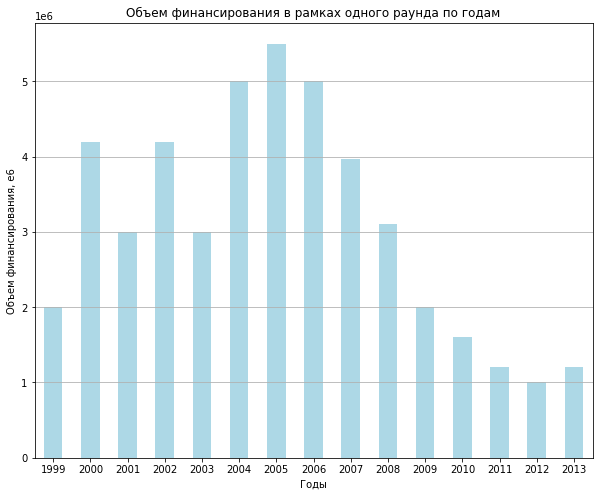

In [195]:
plt.figure(figsize = (10,8))
pivot_table.iloc[:,0].plot(kind = 'bar', rot = 0, color = 'lightblue', xlabel = 'Годы',
                          ylabel = 'Объем финансирования, e6',
                          title = 'Объем финансирования в рамках одного раунда по годам')
plt.grid(axis = 'y')
plt.show()


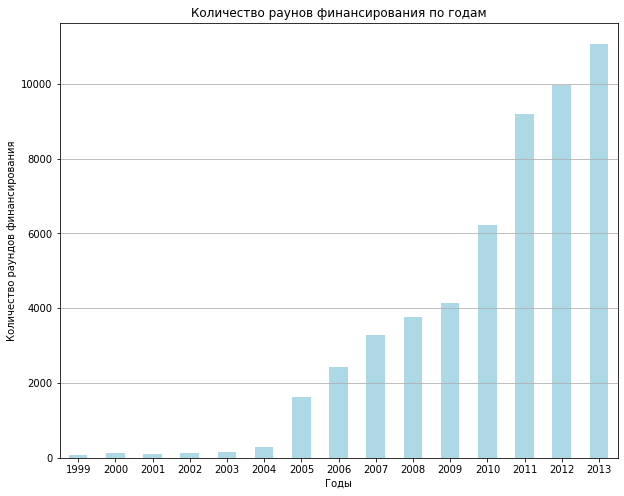

In [196]:
plt.figure(figsize = (10,8))
pivot_table.iloc[:,1].plot(kind = 'bar', rot = 0, color = 'lightblue', xlabel = 'Годы',
                          ylabel = 'Количество раундов финансирования',
                          title = 'Количество раунов финансирования по годам')
plt.grid(axis = 'y')
plt.show()


**P.S. Не знаю как объединить их на одном графике, пробовал разные способы но не выходит. Спасите!!!**

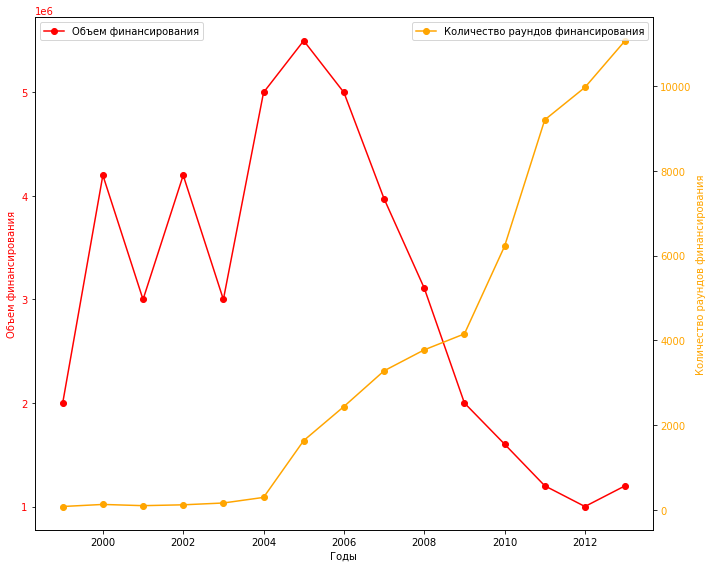

In [197]:
# Код ревьюера

# Создаю фигуру и две оси каждая из которых будет отвечать за свой график из-за очень разного размера величины
fig, ax1 = plt.subplots(figsize=(10, 8))

#  Объем финансирования
ax1.plot(pivot_table.index, pivot_table.iloc[:, 0], marker='o', color='red', label='Объем финансирования')
ax1.set_xlabel('Годы')
ax1.set_ylabel('Объем финансирования', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Количество раундов финансирования
ax2 = ax1.twinx()  
ax2.plot(pivot_table.index, pivot_table.iloc[:, 1], marker='o', color='orange', label='Количество раундов финансирования')
ax2.set_ylabel('Количество раундов финансирования', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Приятные визуальные бонусы
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


На основе полученной сводной таблицы были созданы графики, демонстрирущие типичное количество средств в рамках одного финансирования и количество финансирований в разрезе по годам.

Теперь ответим на вопросы заказчика:
- В каком году типичный размер собранных в рамках одного раунда средств был максимален? Типичный размер собранных средств в рамках одного раунда финансирования продемонстрировал максимальные значения в 2005 году и составил 5.5 млн.

- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году? Начиная с 2003 года тенденция на количество раундов финансирования врмках одного года увеличивалась, в 2013 году количество раундов составило 11072, что превышает значение предыдущего года на 1202 (почти 12% по отношению к предыдущему году). В вопросе тенденции на размер финансирования в рамках одного ранда можно заметить спад, котрый начался с 2005 года. Вероятнее всего эти два значения связаны между собой, однако стоит обратить внимание, что при увеличении раундов финансирования 2013 году по сравнению с 2012, объем финансирования также увеличился на 200 тыс. соотвественно. Это также может быть связано с появлением новых источников финансирования.



### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [198]:
# Для начала объединим датасеты people и education
people_education = pd.merge(people, education, left_on = 'id', right_on = 'person_id', how = 'left',
                           suffixes = ('_people','_education'))

In [199]:
# Оценим объем полученного датафрейма

people_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


В ходе создания объединенного датафрейм возник дубликаты в данных так как есть сотрудники, у которых несколько записей об образовании.

In [200]:
# Удалим дубликаты по полю id_people
people_education.drop_duplicates(subset = 'id_people', keep='first', inplace = True)

In [201]:
pe = people_education.groupby('company_id')['id_people'].count()
display(pe)

company_id
1.0          2
2.0          1
3.0          3
4.0         13
5.0         61
            ..
285897.0     2
285953.0     1
285972.0     2
285996.0     1
286091.0     6
Name: id_people, Length: 22921, dtype: int64

In [202]:
pe.max()

244

In [203]:
pe.min()

1

In [204]:
# Учтем статистические показатели
pe.describe()

count    22921.000000
mean         1.510144
std          2.764379
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
Name: id_people, dtype: float64

В полученный список вошла информации о 22921 компаниях. Максимальное количество сотрудников в компании составляет 244 человек, а минимальное - 1.

В экономике принято разделять предприятия, в зависимости от количества сотрудников, на 4 группы:
- микропредприятия;
- малые предприятия;
- средние предприятия;
- крупные предприятия.

Каждая из групп имеет свои границы, например от 1 до 15 в микропредприятиях и свыше 500 в крупных. Учитывая, что в данном случае рассматриваются стартапы, а также размах и статистчиеские показатели процентилей, изменим эти границы, однако группы оставим такими же. 

Список групп компаний по количеству сотрудников (учитывая правые границы диапозонов):
- микростартапы - от 0 до 1 человек;
- малые стартапы  - от 1 до 10;
- средние стартапы - от 10 до 30;
- крупные стартапы - свыше 30.

Границы групп определены исходя из значений процентилей (25-процентиль и 75 процентиль), а также максимального значения. При выводе информации также заметно, что встречаются значения попадюущие в каждый из заявленных промежутков.

Для удобства работы с данными об образовании добавим поле, которое будет хранить значение-индикатор (о - образования нет, 1 - образование есть), заполнение произведем на основе наличия данных в стобце `instituition` и `graduated_at`. В данном случае мы отбросим только тех сотрудников, у которых нет данных об образовании. 

In [205]:
def education_isna(row):
    if pd.isna(row.instituition) & pd.isna(row.graduated_at):
        return 0
    else:
        return 1

people_education['education'] = people_education.apply(education_isna, axis = 1)

In [206]:
people_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226708 entries, 0 to 267693
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         226708 non-null  int64         
 1   first_name        226703 non-null  object        
 2   last_name         226707 non-null  object        
 3   company_id        34614 non-null   float64       
 4   network_username  38867 non-null   object        
 5   id_education      68071 non-null   float64       
 6   person_id         68071 non-null   float64       
 7   instituition      68031 non-null   object        
 8   graduated_at      36387 non-null   datetime64[ns]
 9   education         226708 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 19.0+ MB


Данные были заполнены значениями 0 и 1, поэтому пропусков по столбцу не возникло.

Создадим сводную таблицу, в которую включим информацию о идентификатор компании, количество сотрудников и среднее значение по полю `education`.

In [207]:
pe_table = people_education.groupby('company_id').agg({'id_people' : 'count',
                                                              'education' : 'mean'}).reset_index()
display(pe_table)

,company_id,id_people,education
0,1.0,2,0.500000
1,2.0,1,1.000000
2,3.0,3,0.666667
3,4.0,13,0.923077
4,5.0,61,0.737705
...,...,...,...
22916,285897.0,2,1.000000
22917,285953.0,1,0.000000
22918,285972.0,2,0.500000
22919,285996.0,1,1.000000


Теперь добавим категорию компании.

In [208]:
def company_category(row):
    if 0 < row['id_people'] <= 1:
        return 'Микростартап'
    elif 1 < row['id_people'] <= 10:
        return 'Малый стартап'
    elif 10 < row['id_people'] <= 30:
        return 'Средний стартап'
    else:
        return 'Крупный стартап'

pe_table['category'] = pe_table.apply(company_category, axis = 1)
display(pe_table)

,company_id,id_people,education,category
0,1.0,2,0.500000,Малый стартап
1,2.0,1,1.000000,Микростартап
2,3.0,3,0.666667,Малый стартап
3,4.0,13,0.923077,Средний стартап
4,5.0,61,0.737705,Крупный стартап
...,...,...,...,...
22916,285897.0,2,1.000000,Малый стартап
22917,285953.0,1,0.000000,Микростартап
22918,285972.0,2,0.500000,Малый стартап
22919,285996.0,1,1.000000,Микростартап


In [209]:
pe_table_plot = pe_table.groupby('category')['education'].mean().reset_index()
pe_table_plot['not_education'] = 1 - pe_table_plot['education']
pe_table_plot

,category,education,not_education
0,Крупный стартап,0.759946,0.240054
1,Малый стартап,0.519951,0.480049
2,Микростартап,0.537370,0.462630
3,Средний стартап,0.541765,0.458235


<Figure size 720x432 with 0 Axes>

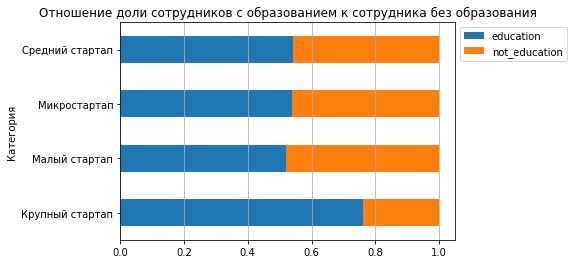

In [210]:
plt.figure(figsize = (10,6))
pe_table_plot.plot(kind = 'barh', x = 'category', stacked = True, title = 'Отношение доли сотрудников с образованием к сотрудника без образования',
                  xlabel = 'Категория')
plt.grid(axis = 'x')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

На основе полученных данных и визуализации заметно, что самая большая доля сотрудников без образования находится в компания категории "Малый стартап". На втром месте микростартапы. Больше всего доля сотрудников с указанным образованием представлят закреплены к компаниях из категории "Крупный стартап".

К отработанным выше датасетом, также можно добавить датасет `degrees`. Ранее датасет уже был подвержен небольшой преобработки связанный с заменой значений и преобразованием типа данных по столбцу идентификатора пользователя. Учитывая, что данные датасета также относятся к ообразованию, то также можем проанализировать данные уже с тремя датасетами.

In [211]:
all_about = pd.merge(people_education, degrees, left_on = 'id_people', right_on = 'object_id', how = 'left')
all_about.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267693 entries, 0 to 267692
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267693 non-null  int64         
 1   first_name        267688 non-null  object        
 2   last_name         267692 non-null  object        
 3   company_id        44788 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109006 non-null  object        
 8   graduated_at      58783 non-null   datetime64[ns]
 9   education         267693 non-null  int64         
 10  id                109056 non-null  float64       
 11  object_id         109056 non-null  float64       
 12  degree_type       97886 non-null   object        
 13  subject           80890 non-null   object        
dtypes: d

После объединения вновь появились дубликаты, это можно заметить по количеству записей в поле `id_people`. Вновь избавимся от них.

In [212]:
# Удалим дубликаты по полю id_people
all_about.drop_duplicates(subset = 'id_people', keep='first', inplace = True)

In [213]:
all_about.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226708 entries, 0 to 267692
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         226708 non-null  int64         
 1   first_name        226703 non-null  object        
 2   last_name         226707 non-null  object        
 3   company_id        34614 non-null   float64       
 4   network_username  38867 non-null   object        
 5   id_education      68071 non-null   float64       
 6   person_id         68071 non-null   float64       
 7   instituition      68031 non-null   object        
 8   graduated_at      36387 non-null   datetime64[ns]
 9   education         226708 non-null  int64         
 10  id                68071 non-null   float64       
 11  object_id         68071 non-null   float64       
 12  degree_type       61401 non-null   object        
 13  subject           50808 non-null   object        
dtypes: d

Учитывая что данные о типе образования не содержат информации о компаниях, то распределение можно отсавить не имзменным, однако стоит переработать заполнение поля `education`, которое было создано как индикатор.

In [214]:
def education_all_isna(row):
    if pd.isna(row.instituition) & pd.isna(row.graduated_at) & pd.isna(row.degree_type) & pd.isna(row.subject):
        return 0
    else:
        return 1

all_about['education'] = all_about.apply(education_all_isna, axis = 1)

In [215]:
# Оценим значения в разрезе по компаниям
ped_table = all_about.groupby('company_id').agg({'id_people' : 'count',
                                                              'education' : 'mean'}).reset_index()
display(ped_table)

,company_id,id_people,education
0,1.0,2,0.500000
1,2.0,1,1.000000
2,3.0,3,0.666667
3,4.0,13,0.923077
4,5.0,61,0.737705
...,...,...,...
22916,285897.0,2,1.000000
22917,285953.0,1,0.000000
22918,285972.0,2,0.500000
22919,285996.0,1,1.000000


In [216]:
# Так как границы групп не менялись, то вновь обратимся к той же функции, функции
ped_table['category'] = ped_table.apply(company_category, axis = 1)
display(ped_table)

,company_id,id_people,education,category
0,1.0,2,0.500000,Малый стартап
1,2.0,1,1.000000,Микростартап
2,3.0,3,0.666667,Малый стартап
3,4.0,13,0.923077,Средний стартап
4,5.0,61,0.737705,Крупный стартап
...,...,...,...,...
22916,285897.0,2,1.000000,Малый стартап
22917,285953.0,1,0.000000,Микростартап
22918,285972.0,2,0.500000,Малый стартап
22919,285996.0,1,1.000000,Микростартап


In [217]:
ped_table_plot = ped_table.groupby('category')['education'].mean().reset_index()
ped_table_plot['not_education'] = 1 - ped_table_plot['education']
ped_table_plot

,category,education,not_education
0,Крупный стартап,0.761682,0.238318
1,Малый стартап,0.520129,0.479871
2,Микростартап,0.537425,0.462575
3,Средний стартап,0.542639,0.457361


<Figure size 720x432 with 0 Axes>

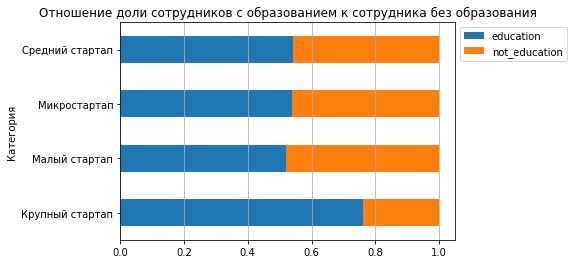

In [218]:
plt.figure(figsize = (10,6))
ped_table_plot.plot(kind = 'barh', x = 'category', stacked = True, title = 'Отношение доли сотрудников с образованием к сотрудника без образования',
                  xlabel = 'Категория')
plt.grid(axis = 'x')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Данные действительно изменились, однако совсем немного, что подтвержает возможность использования degrees как дополнительно датафрейма для объединения. При этом малейшие изменения никак не отразились на тенденции. 


Рассмотрим дополнительно интересный факт: как распределились компании по категориям.

In [219]:
table_category = ped_table.groupby('category')['company_id'].count().reset_index()
table_category

,category,company_id
0,Крупный стартап,16
1,Малый стартап,4685
2,Микростартап,18116
3,Средний стартап,104


Компании распределились по категориям очень неравнозначно: больше всего компаний из числа микростартапов, в которых трудоустроен только 1 человек - 18116 компаний, малых стартапов меньше - 4685 компаний. Самые маленькие количество компаний вошло в крупный стартап - 16 компаний.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username`встречается в двух датасетах: `company_and_rounds`, `people`. Первый датасет хранит информцию о компаниях и раундах финансирования, другой о сотрудниках. Поробуем для начала сравнить уникальные значения в данных столбцах.

In [220]:
company_unique = company_and_rounds['network_username'].unique()

In [221]:
people_unique = people['network_username']

In [222]:
count = 0
for network_username in people_unique:
    if network_username in company_unique:
        count += 1
display(count)

2270

Совпадение в данных действительно присутсвует. Оговоримся сразу, учитывая что в компании может быть несколько сотрудников, были взяты все значения столбца имени в сети из датасета сотрудников. Затем посчитано количество присутсвия этих значений в уникальных именах компании в сети. Полученное значение составило 2270. Это значит, что между указанными столбцами именно столько дубликатов нашлось. Учитывая информацию полученную в прошлом задании, мы знаем что по идентикатору компании 34614 сотрудников закреплены за различными компаниями.

Отдельно проверим уникальность имени в сети.

In [223]:
display(people['network_username'].nunique())
people['network_username'].value_counts()

38421

iWatchLife         6
chrislogan         5
firstscribe        4
ConnectAndSell     4
bubblehubdotcom    3
                  ..
davebryand         1
BillBurnett1       1
EricLarch          1
jeremister         1
danielha           1
Name: network_username, Length: 38421, dtype: int64

Количество ункиальных значений почти равно общему количеству записей, это говорит о том, что дубликаты в именах действительно присутствуют. Но в соотношении с данными о идентификаторе компании в этом же датасете, оно ничтожно мало, таким образом будут отброшены данные о крупных компания где много сотрудников. Кроме того, оценивая полноту данных в датасете компании, в поле имени в сети присуствуют пропуски, в отличии от идентификаторе.

На основе вышеизложенного делаем вывод о том, что данные несопоставимы и объединять датасеты на осове поля `network_username` невозможно!


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Ранее, при изучении данных, была выдвинута гипотеза о том, что данные в датасете `company_and_rounds` выглядят так, будто их собрали из разных таблиц. Это совпадает с гипотезой заказчиков, о том, что данные раньше хранились иначе. 

Вытекает следующее предложение: 
- обработать датасет таким образом, чтобы оставить в нем все поля, но при этом удалить значения имеющие пропуски по важным полям о суммах финасирования, в тех случах если компания его получала, поскольку это исказит анализ;
- разделить датасет на два разных, в одном оставить всю ифномрацию о компаниях, а в другом о ранудах.

In [224]:
# Для начала создадим копию
company_and_rounds_copy = company_and_rounds.copy()

In [225]:
# Повторно вывеведем информацию о датасете
company_and_rounds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [226]:
# Первоначально выберем записи в, которые удовлетворяют условию наличия финансовых и инвестиционных раундов 
#  и при этом записи о финансировании была

carc_1 = company_and_rounds_copy[((company_and_rounds_copy['investment_rounds'] > 0) | (company_and_rounds_copy['funding_rounds'] > 0)) & (company_and_rounds_copy['company_id'])]

In [227]:
carc_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52626 entries, 0 to 217471
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_ID           52626 non-null  float64       
 1   name                 52626 non-null  object        
 2   category_code        51163 non-null  object        
 3   status               52626 non-null  object        
 4   founded_at           43196 non-null  datetime64[ns]
 5   closed_at            2943 non-null   datetime64[ns]
 6   domain               50785 non-null  object        
 7   network_username     34013 non-null  object        
 8   country_code         50182 non-null  object        
 9   investment_rounds    52626 non-null  float64       
 10  funding_rounds       52626 non-null  float64       
 11  funding_total        52626 non-null  float64       
 12  milestones           52626 non-null  float64       
 13  funding_round_id     52626 non

Суммарно вышло 52626 записией, в которых присуствует большинство данных необходимых для анализа.

Теперь добавим к этим данным значения, в которых присутсвует информация о раундах инвестированния, но финансирование равно нулю. В описание данных заметно, что указываются только финансовые раунды. Дополнительно проверим это выведя значения о компания, у которых были инвестиционные раунды, не был финасовых и при этом есть информация о финансировании.

In [228]:
company_and_rounds_copy[((company_and_rounds_copy['investment_rounds'] > 0) & (company_and_rounds_copy['funding_rounds'] == 0)) & (company_and_rounds_copy['company_id'])]

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year_funded


Результат показал, что таких записей нет, значит предположение о том, что указаны только финансовые раунды - верное.

In [229]:
# Продолжим составлять выборки данных по условиям
# не было инвестиционных и финансовых раундов 


carc_2 = company_and_rounds_copy[((company_and_rounds_copy['investment_rounds'] == 0) & (company_and_rounds_copy['funding_rounds'] == 0)) & (company_and_rounds_copy['company_id'].isna())]

In [230]:
# Теперь выведем компании в которых были инвестиционные раунды и не было финансовых 


carc_3 = company_and_rounds_copy[((company_and_rounds_copy['investment_rounds'] > 0) & (company_and_rounds_copy['funding_rounds'] == 0)) & (company_and_rounds_copy['company_id'].isna())]

In [231]:
# Объединим датасеты в единый датафрейм

carc = pd.concat([carc_1, carc_2, carc_3])
carc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217457
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Количество данных по сравнению с первичном датасетом почти не изменилось, однако были отброшены значения о финансирование, которое не закреплено за компанией. Теперь проверим поля на явные дубликаты.

Дубликаты будем считать полное совпадение по id компании, названию, дате появления, дате финансирования и объему финансовых средств. Таким образом мы сможем избавиться от данных, которые могли задублироваться.

In [232]:
carc.duplicated(subset = ['company_ID', 'name', 'founded_at', 'funded_at', 'funding_round_type', 'raised_amount']).sum()

110

Найдено 110 дублирующих данных. Удалим их, оставив только первые значения.

In [233]:
carc.drop_duplicates(subset = ['company_ID', 'name', 'founded_at', 'funded_at', 'funding_round_type', 'raised_amount'], keep = 'first', inplace = True)

Осталось 217362 записи. Теперь приступим к неявным дубликатам. Провести поиск неявных дубликатов в таких больших данных проблематично. Приведем все ранее проверяемые поля к нижнему регистру и снова проверим.

In [234]:
carc['name'] = carc['name'].str.lower()
carc['funding_round_type'] = carc['funding_round_type'].str.lower()

In [235]:
# Вновь проверим дубликаты
carc.duplicated(subset = ['company_ID', 'name', 'founded_at', 'funded_at', 'funding_round_type', 'raised_amount']).sum()

0

После приведения строчных данных к единому регистру дубликатов не было найдено. Теперь избавимся от лишних столбцов, которые дублируют информацию. В данном случае такой столбец только один - это  `company_id`, данные в нем дублируются с одноименным столбцом.

In [236]:
carc.drop(labels = 'company_id', axis = 1, inplace = True)
carc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217362 entries, 0 to 217457
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217362 non-null  float64       
 1   name                 217362 non-null  object        
 2   category_code        143778 non-null  object        
 3   status               217362 non-null  object        
 4   founded_at           109856 non-null  datetime64[ns]
 5   closed_at            3445 non-null    datetime64[ns]
 6   domain               147052 non-null  object        
 7   network_username     95445 non-null   object        
 8   country_code         108505 non-null  object        
 9   investment_rounds    217362 non-null  float64       
 10  funding_rounds       217362 non-null  float64       
 11  funding_total        217362 non-null  float64       
 12  milestones           217362 non-null  float64       
 13  funding_round_

Столбец был удален!

Теперь вернемся ко второму предложению, разделить датасет `company_and_rounds` на два разных: `company`, `rounds`. Раньше мы уже предположили как именно они были соединенны. Вероятнее всего, все поля до `funding_round_id` относились к компаниям, а остальные к раундам. Именно так и разделим.

In [237]:
company = company_and_rounds[company_and_rounds.columns[0:13]].copy()
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [238]:
rounds = company_and_rounds[company_and_rounds.columns[13:]].copy()
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   year_funded          52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 16.6+ MB


Таким образом было получена два различных датасета. Теперь отфильтруем их от пропусков и дубликатов в записях.

In [239]:
# Так как датасеты разделены приведем названия столбцов к единому стилю
company = company.rename (columns = {'company_ID' : 'company_id'})

company.dropna(subset = ['company_id'], inplace = True)
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


Поля с пропуском в id были удалены. Теперь аналогично поступим со вторым датасетом.

In [240]:
rounds.dropna(subset = ['funding_round_id'], inplace = True)
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   year_funded          52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


Теперь избавимся от дубликатов.

In [241]:
# Для начала приведем все к единому стилю
company['name'] = company['name'].str.lower()

# Теперь проверим количество явных дубликатов
company.duplicated(subset = ['company_id', 'name', 'founded_at']).sum()

20919

Количество дубликатов составило 20919 записей, удалим их.

In [242]:
company.drop_duplicates(subset = ['company_id', 'name', 'founded_at'], inplace= True)

In [243]:
# Совершим аналогичные действия для датасета rounds
# Для начала приведем все к единому стилю
rounds['funding_round_type'] = rounds['funding_round_type'].str.lower()

# Теперь проверим количество явных дубликатов
rounds.duplicated(subset = ['company_id', 'funding_round_type', 'funded_at', 'raised_amount']).sum()

111

In [244]:
rounds.drop_duplicates(subset = ['company_id', 'funding_round_type', 'funded_at', 'raised_amount'], inplace = True)

In [245]:
# Выведем информацию о полученных датасетах
display(company.info())
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52817 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52817 non-null  float64       
 1   company_id           52817 non-null  float64       
 2   funded_at            52571 non-null  datetime64[ns]
 3   funding_round_type   52817 non-null  object        
 4   raised_amount        52817 non-null  float64       
 5   pre_money_valuation  52817 non-null  float64       
 6   participants         52817 non-null  float64       
 7   is_first_round       52817 non-null  float64       
 8   is_last_round        52817 non-null  float64       
 9   year_funded          52571 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


Получили два датасета с информацией о компаниях и раундах финансирования соотвествено. Размеры датасетов составили:
- `company` - 13 столбцов и 196553 строки;
- `rounds` - 10 столбцов и 52817 строк (с учетом ранее введенного столбца с информацией о годе финансирования).

### Общий вывод по разделу:

В ходе работы над задачами в рамках раздела были выполнены следующие задачи:
- изучены тенденции финансовых раундов (их количества и типичные размеры в разрезе по годам);
- оценена доля сотрудников с образованием и без него в разичных категориях компаний (микростартапы - крупные стартапы);
- изучена возможность использования других полей для объединения датасетов;
- предобработан самый крупный из представленных датасетов.

Кратике результаты:
- Тендеция финансовых раундов ежегодно склонна к увеличению их количества, однако типичные суммы финансирования начиная с 2005 года демострируют спад (от 5,5 млн, до 1 млн. в 2012). В 2013 гоу типичные суммы возросли на 200 тыс. по сравнению с предыдущим годом.
- В среднем доля сотрудников указывающих образование выше в крупных стартапах (количество сотрудников в данных стартапах свыше 30), меньше всего в малых стартапах (от 2 до 10 сотрудников). 2 и 3 места разделили микростартапы (1 сотрудник) и средние стартапы (от 11 до 30 сотрудников) соответственно. Рассматривая с обратной стороны (средняя доля сотрудников в компаниях не указавыших образование) топ переворачивается зеркально.
- Было замечено, что в двух представленных датасетах есть поле `network_username`, которое может стать еще одним связующим звеном при объединении данных. Рассматривая значения полей подробнее было выяснено, что данные в этих столбцах датасетов почти не сочетаются (сочетания носит случайный неповторяющийся характер выраженный в совпадении имени компании и сотрудника в сети). Решение: **использовать столбец для объединения датасетов нельязя**;
- в ходе изучения датасета `company_and_rounds` была выдвинута гипотеза о возможном объединении двух различных датасетов, которая согласуется с гипотезой заказчика о том, что раньше данные хранились иначе. В результате был получен один общий датасет, из которого исключены пустые значения и дубликаты (в том числе дублирующиеся столбцы), что позволит провести оценку каждой компании по отдельности. Также созданы два датасета, в которых была разделена информация о компаниях и раундах соотвественно. Учитывая будущие задачи заказчика все столбцы были сохраненны.


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

Опираясь на исследовательские задачи, полученные от заказчика, можно следующий вывод: для ответа  на вопросы заказчика достаточно объединить две таблицы: полученный в процессе переработки датасета `company_and_rounds` датасет `company` и датасет `acquisition`. В них содержится достаточное количество данных для проведения исследований и ответов на вопросы заказчика.

In [246]:
# Для начала выберем только те компании, у которых указаны значения
# funding_rounds или investment_rounds больше нуля,
# или те, у которых в колонке status указано acquired. 
companyes = company[(company['funding_rounds'] > 0) | (company['investment_rounds'] > 0) | (company['status'] == 'acquired')]

In [247]:
companyes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

Теперь объединим данные полученного датасета с датасетом acquisition.

In [248]:
company_and_acquier = companyes.merge(acquisition, left_on = 'company_id', right_on = 'acquired_company_id', how = 'left')
company_and_acquier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id              

Получили единый датафрейм с размерами 19 столбцов и 40890 строк. Количество строк увеичислось, что может говорить либо о дубликатах во втором датасете, либо наличии нескольких записях о покупке.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [249]:
# Проверим статистические данные по столбцу funding_total
companyes['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

По полученной статистической информации, заметно что среднее значени и медаина сильно отличаются, при этом среднее выше чем медиана, что говорит о неравномерном распределении данных и наличии вытянутого правового хвоста в распределении. При этом, 25-процентиль показывает что чертверть значений равны нулю, подтвержая высокие значения в правом хвосте (вероятнее всего именно это влияет на разницу среднего и медианы). Среднеквадратичное отклонение также велико, тем самым демонстрируя высокий разброс в значениях данных. 


In [250]:
companyes[companyes['funding_total'] == 0]['funding_total'].count()

12873

Больше 25% компаний не получили никакого финансирования и вероятнее всего были выкуплены сразу.


Построим график с усами. 

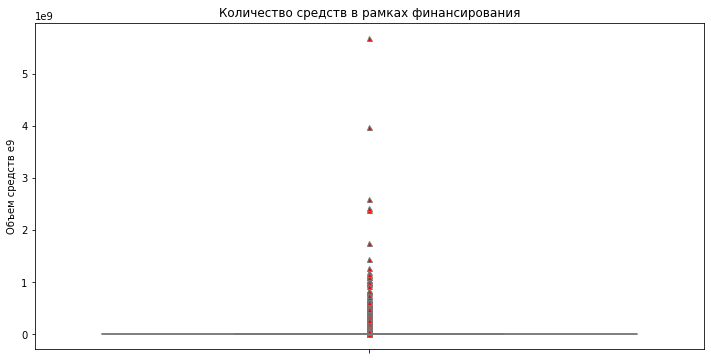

In [251]:
plt.figure(figsize = (12,6))
sns.boxplot(y = 'funding_total', data = companyes, color = 'lightblue',
           flierprops = dict(markerfacecolor = 'red', marker = '^'))
plt.title('Количество средств в рамках финансирования')
plt.ylabel('Объем средств e9')
plt.show()

Из полученного графика ничего не понятно, оценим данные без выбросов.

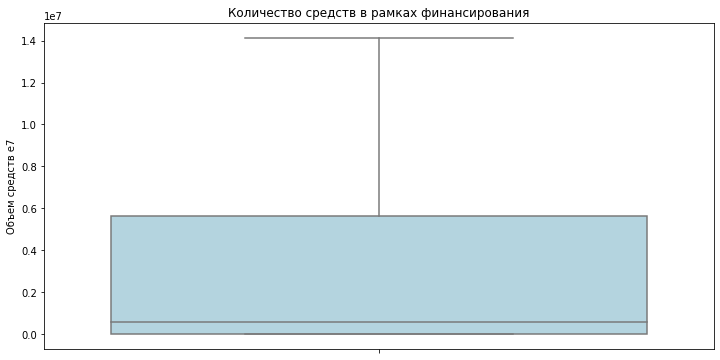

In [252]:
plt.figure(figsize = (12,6))
sns.boxplot(y = 'funding_total', data = companyes, color = 'lightblue',
           showfliers = False)
plt.title('Количество средств в рамках финансирования')
plt.ylabel('Объем средств e7')
plt.show()

Заметно, что большинство данных расположены в промежутке от 0 до 0,57 * е7. При этом допустимы также значения суммы финансирования до 1,4 * е7, оне не относятся к выбросам. 

Чтобы детальнее изучить также рассмотрим гистограмму распределения цен.

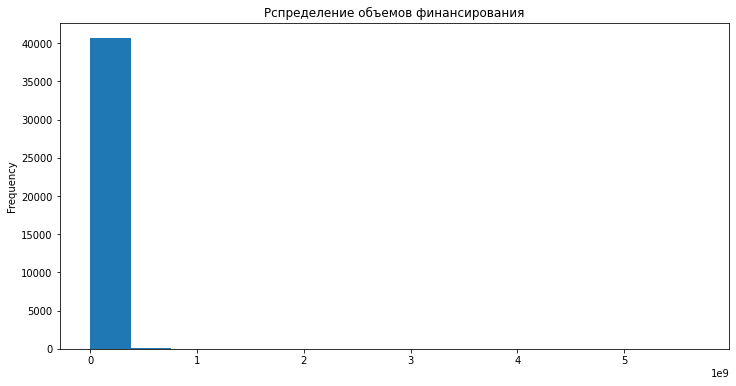

In [253]:
plt.figure(figsize = (12,6))
companyes['funding_total'].plot(kind = 'hist', bins = 15,
                                title = 'Рспределение объемов финансирования',
                               xlabel = 'Объем финансирования',
                               ylabel = 'Количество наблюдений')
plt.show()

Вновь стало заметно, как аномальные значения финансирования влияют на картину. Избавимся от них.

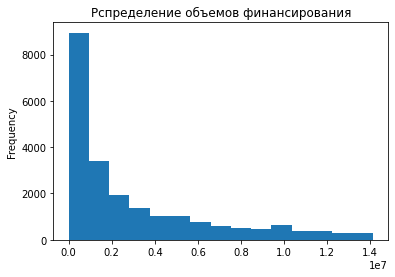

count    2.201600e+04
mean     2.964868e+06
std      3.527162e+06
min      2.910000e+02
25%      3.357500e+05
50%      1.400000e+06
75%      4.500000e+06
max      1.412100e+07
Name: funding_total, dtype: float64

5858

In [254]:
Q1 = companyes['funding_total'].quantile(0.25)
Q3 = companyes['funding_total'].quantile(0.75)
IQR = Q3 - Q1
companyes[(companyes['funding_total'] > max(0,Q1 - 1.5*IQR)) & 
          (companyes['funding_total'] < Q3 + 1.5*IQR)]['funding_total'].plot(kind = 'hist', bins = 15,
                                title = 'Рспределение объемов финансирования',
                                xlabel = 'Объем финансирования',
                                ylabel = 'Количество наблюдений')
plt.show()
display(companyes[(companyes['funding_total'] > max(0,Q1 - 1.5*IQR)) & 
          (companyes['funding_total'] < Q3 + 1.5*IQR)]['funding_total'].describe())
companyes[companyes['funding_total'] > Q3 + 1.5*IQR]['funding_total'].count()

Гистограмма распределения объемов финансирования компаний демонстрирует неравномерность в распределении. Многие значения сконцентрированы в промежутке от 0 до 0,57 * е7. Это доказывает, что эти значения наиболее типичные в рамках финансирования,  однако, в данном случае, значения большие 1,4 * е7 нельзя отнести к выбросам в данных, поскольку таких значений достаточно много (свыше 5858 значений).

Описание таких данных и поиск типичных значений методом `describe()` мало применимы, поскольку не отражают всей полноты картины. Однако, если исключить из списка компании, которые не получили финансирования, то можно найти типичные объемы финансирования. Проверим это ради интереса.

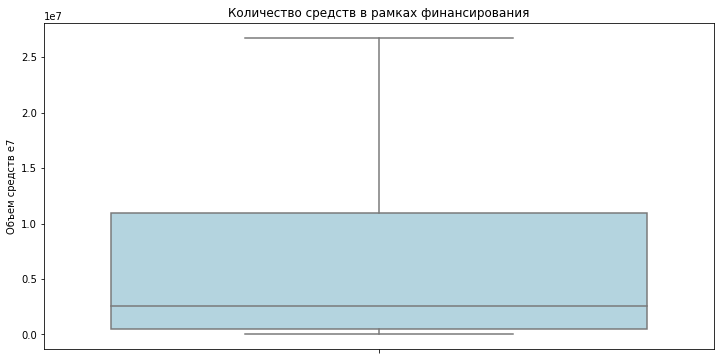

count    2.787400e+04
mean     1.481652e+07
std      6.775936e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.564500e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

In [255]:
plt.figure(figsize = (12,6))
sns.boxplot(y = 'funding_total', data = companyes[companyes['funding_total'] > 0], color = 'lightblue',
           showfliers = False)
plt.title('Количество средств в рамках финансирования')
plt.ylabel('Объем средств e7')
plt.show()
companyes[companyes['funding_total'] > 0]['funding_total'].describe()

Убирая из расчета компании, которые вовсе не получили никакого финансирования можно определить типичные значения финансирования: от 500 000 до 11 000 000 (медиана составляет 2 564 500).


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [256]:
# Выберем данные из датасета по условия funding_totel > 0 и price_amount = 0 или 1
caa_0_1 = company_and_acquier[(company_and_acquier['funding_total'] > 0) & 
                              ((company_and_acquier['price_amount'] == 0) | 
                              (company_and_acquier['price_amount'] == 1))]
caa_0_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 25 to 40872
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            1618 non-null   float64       
 1   name                  1618 non-null   object        
 2   category_code         1553 non-null   object        
 3   status                1618 non-null   object        
 4   founded_at            1285 non-null   datetime64[ns]
 5   closed_at             13 non-null     datetime64[ns]
 6   domain                1546 non-null   object        
 7   network_username      812 non-null    object        
 8   country_code          1536 non-null   object        
 9   investment_rounds     1618 non-null   float64       
 10  funding_rounds        1618 non-null   float64       
 11  funding_total         1618 non-null   float64       
 12  milestones            1618 non-null   float64       
 13  id              

По указанным условиям получена выборка из 1618 компаний.

Опишем полученные данные методом `describe()`.

In [257]:
caa_0_1['funding_total'].describe()

count    1.618000e+03
mean     1.815296e+07
std      1.445030e+08
min      3.750000e+03
25%      2.000000e+06
50%      6.000000e+06
75%      1.550000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

На данный момент 25 и 75 -процентиль полученных данных о суммарном объеме средств финансирования компаний равны 2 * е6 и 1.55 * е7. 

Рассчитаем границы выбросов аналитическим способом.

In [258]:
Q1 = caa_0_1['funding_total'].quantile(0.25)
Q3 = caa_0_1['funding_total'].quantile(0.75)
IQR = Q3 - Q1
display(f'Нижняя граница равна: {max(0,Q1 - 1.5*IQR)}')
display(f'Верхняя граница равна: {Q3 + 1.5*IQR}')

'Нижняя граница равна: 0'

'Верхняя граница равна: 35750000.0'

In [259]:
# Воспользуемся функцией le(), которая показывает отмечает числа меньшие указанного 1, а большие 0
# в сочетании с функцией mean() найдем долю чисел серии, которые меньше указанного значения.
low = caa_0_1['funding_total'].le(0).mean() * 100
high = caa_0_1['funding_total'].le(Q3 + 1.5*IQR).mean() * 100
display(low)
high

0.0

90.91470951792337

Таким образом, границы выбросов по столбцу `funding_total` соотвествуют 0- и 91- процентилю.

Теперь выведем значения этих процентилей.

In [260]:
display(caa_0_1['funding_total'].quantile(0))
caa_0_1['funding_total'].quantile(0.91)

3750.0

35894000.00000001

Получиили следующие значения - нижний процентиль (0-процентиль) составил 3750, а верхний (0.91-процентиль) - 35894000.

Учитывая своебразность данных, а также большое количество аномальных значений, замена имеет место быть и будет корректна. При этом, значения процентилей, для этих компаний,не сильно отличаются от границ выбросов, так как все анализируемые компании имеют финансирование отличное от 0.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [261]:
# Сгруппируем данные по категории компании и проверим медианное значение общего финансирования
companyes_median_top = companyes.groupby('category_code')['funding_total'].median().sort_values(ascending = False).head(15)
companyes_median_top

category_code
semiconductor      8100000.0
cleantech          6000000.0
medical            5400000.0
nanotech           5115960.0
biotech            4000000.0
security           2024640.0
analytics          2000000.0
network_hosting    2000000.0
manufacturing      1895040.0
enterprise         1617100.0
hardware           1408400.0
finance            1350000.0
automotive         1300000.0
fashion            1200000.0
transportation     1100000.0
Name: funding_total, dtype: float64

Получили Топ-15 категорий компаний, которые характеризуются наибольшими значениями типичного объема финансирования. Визуализируем эти данные для удобства восприятия.

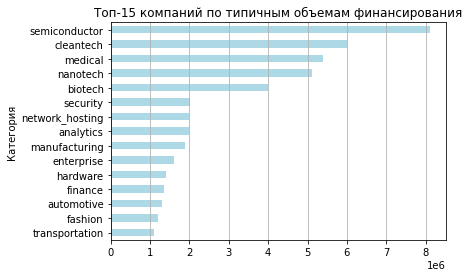

In [262]:
companyes_median_top.sort_values().plot(kind='barh', color = 'lightblue', title = 'Топ-15 компаний по типичным объемам финансирования',
                         xlabel = 'Категория')
plt.grid(axis = 'x')
plt.show()

Из полученных данных и диаграммы видно, что самыми большими типичными значениями объема финансирования обладают компании технического направления деятельности (полупроводники, чистое производство/чистые технлологии,), также встречаются междицисциплинарные (нанотехнологии и биотехнологии), медицина, транспорт, финансы и мода.

In [263]:
# Сгруппируем данные по категории компании и проверим среднее отклонение значение общего фина
companyes_std_top = companyes.groupby('category_code')['funding_total'].std().sort_values(ascending = False).head(15)
companyes_std_top

category_code
automotive          1.832047e+08
mobile              1.459792e+08
social              1.114758e+08
health              1.050341e+08
nanotech            9.596109e+07
manufacturing       9.304530e+07
cleantech           9.215550e+07
network_hosting     6.288838e+07
public_relations    5.840271e+07
biotech             5.465791e+07
transportation      5.372778e+07
hardware            5.078738e+07
news                5.054718e+07
government          4.865810e+07
travel              4.806784e+07
Name: funding_total, dtype: float64

Теперь рассмотрим распределение компаний по размаха в объемах финансирования.

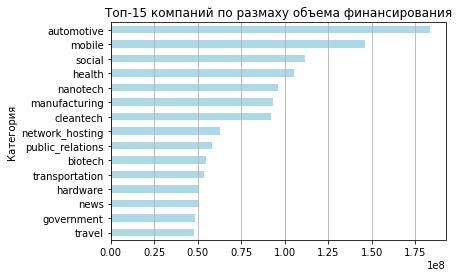

In [264]:
companyes_std_top.sort_values().plot(kind='barh', color = 'lightblue', title = 'Топ-15 компаний по размаху объема финансирования',
                         xlabel = 'Категория')
plt.grid(axis = 'x')
plt.show()

Список категорий, вошедший в Топ-15 по размаху объема финансирования отличается от Топ-15 по типичному финансированию. В нем, в отличии от предыдущего, присуствуют социальные и государственные направления (социальная категория, связ ис общественность, новости, государственные компаниий, туристические).

Принимая во внимание большой размах в общем финансировании компаний использование среднего значения для оценки категорий с наибольшим объемом финансирования невозможно, потому что оно подвержено большим аномальным значениям, присуствующим в таблице. В связи с этим для определениях типичных объемов финансирования в рамках категории применина медиана. В свою очередь разброс цен изучен за счет среднеквадратичного отклонения, котоое как раз указывает на стпень разброса - чем больше значение, тем больше разброс. Сформировав Топ-15 значений по каждому из показателей можно заметить, какие компании интереснее всего для инвесторов.  
К таким компаниям можно отнести:
- Нанотехнологии;
- Чистые технологи;
- Мануфактуру;
- Интернет-хостинг;
- Биотехнологии;
- Разработку ПО;
- Автоматизацию;
- Транспорт.

При этом, инвестором также стоит обратить внимание на полупроводниковые компании, они не характеризуются большим разбросов в объеме, но демострируют высокий объем финансирования по сравнению с остальными.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [265]:
# Для начала изучим статистические показатели столбца и оценим их
companyes['funding_rounds'].describe()

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

Среднее значение и медиана приблизительно равны и составляют 1,3 и 1 соотвественно. Хотя разница и небольшая, но учитывая мнимальное и максимальное значение (0 и 15 соответственно) размах в представленных значениях небольшой, что говорит о том, что среднее в данном случае подвержено аномальным значениям. Также об этом говорит среднеквадратичное отклонение, которое почти равно среднему. 25- и 75-процентиль равно 1 и 2 раундам.

In [266]:
# Найдем типичные значения раундов в зависимости от статуса компании, для этого вопспользуемся median
cfrm = companyes.groupby('status')['funding_rounds'].median()
cfrm

status
acquired     0.0
closed       1.0
ipo          1.0
operating    1.0
Name: funding_rounds, dtype: float64

Среди всех групп компаний, распределенных по статусу, типичным количеством раундов финансирования является 1. Исклчючением являются выкупеленные стартапы, у них нет раундов финансирования, что может говорить о том, что данные стартапы были весьма потенциальны и интересны инвесторам, так как сразу выкупались.

Теперь оценим средние значения количество раундов для каждой группы стартапов и сопоставим их с общим средним значением.

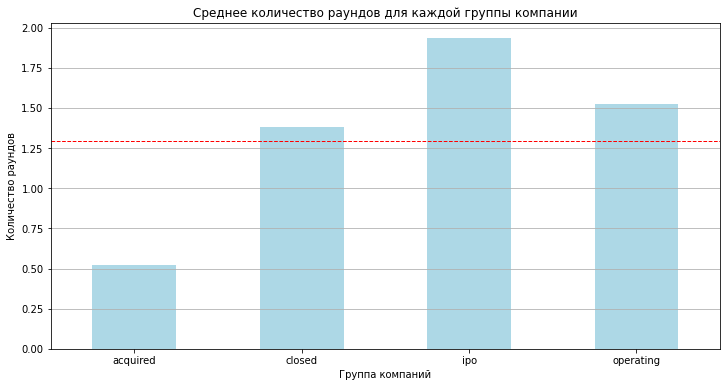

status
acquired     0.523526
closed       1.381453
ipo          1.934375
operating    1.522658
Name: funding_rounds, dtype: float64

In [267]:
plt.figure(figsize=(12,6))
companyes.groupby('status')['funding_rounds'].mean().plot (kind = 'bar',
                                                          title = 'Среднее количество раундов для каждой группы компании',
                                                          xlabel = 'Группа компаний',
                                                          ylabel = 'Количество раундов',
                                                          rot = 0,
                                                          color = 'lightblue')
mean = companyes['funding_rounds'].mean()
plt.axhline(mean, color = 'red', linestyle = '--', linewidth = 1)
plt.grid(axis = 'y')
plt.show()
companyes.groupby('status')['funding_rounds'].mean()

Из графика видно, что меньше всего среднее значение раундов для выкупленных стартапов, оно составляет свыше 0,5 раунда на компанию. Во всех остальных случаях групп среднее количество раундов выше общего среднего значения по всем компаниям. При этом, больше всего раундов финансирования в компания, которые занялись первичным размещением акций (1,93 раунда на компнаию). Закрытые компании чаще всего проходят лишь один раунд финансирования, В свою очередь действующие - 1,52 раунда на компанию.

### Промежуточный вывод по разделу:

В ходе работы над разделом было выполнено 4 задачи от заказчика:
- Анализ выбросов. Рассмотрены знанчения общего финансирования компаний, которые удовлетворяли условию что они имеют хотя бы один инвестиционный или финансовый раунд или были выкуплены;
- Куплены забесплатно? Именно такой вопрос был задан заказчиком для изучения компаний, которые при наличии финасирования были проданы за 0 ил 1 доллар. В ходе анализа таких компаний (1618 позиций в датафрейме) были получены данные о типичных объемах финансирования;
- Цены стартапов по категориям. По запросу был выведен Топ-15 категорий, которые получают большое типичное финансирование, и   Топ-15 категорий стартапов, которые имеют наибольший разброс финансирования;
- Сколько раундов продержится стартап перед покупкой. В среднем все стартапы имеют хотя бы один раунд финасирования это демострируют и медиана и среднее значение (больше чем медиана).


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

### Вывод по проделнной работе

В работе были выполенны все задания заказчика. 

**На первом этапе** произведено **знакомство с данными** и изучена их структура. **Выдвинуты первичные гипотезы** о хранении данных, причинах появления пропусков, а также **тонких (пробмленых) местах в данных, которые могут нести риск** в проведении анализа и исследования.  

**На втором этапе** осуществлена предобработка данных и даны ответы на первые вопросы заказчика, связанные с анализом данных.  
- **Определена тенденция в количестве и объемах финансирования стартапов**. **Объемы финансирования с 2005 года ежегодно уменьшались**, однако **в 2013 году показатели увелчились по сравнению с 2012 годом**. **Количество раундов** финансирования ежегодно **увеличивалось**. Таким образом, пусть и объемы становились меньше, но **ежегодно** (с 2005 по 2013) в рамках финансирования стартапы получали **почти одинаковые суммы**.
- Рассмотрено как образование сотрудников влияло на размер (в зависимсоти от численности сотрудников) стартапа. **Больше всего сотрудников указали образование в стартапах отнесенных к категории крупных**. **В осталных категориях** среднее количество сотрудников указавших образование **почти одинаково** и отличается лишь на пару процентов (меньше всего в малых компаниях). Также оценена возможность **использования датасета `degrees`**. Данные при его добавлении изменяются не сильно, что **доказыет возможность его присоединения для осуществления анализа**.
- Изучена возможность замены столбца с идентифкатором компании на **`network_username`**, который также встречается в нескольких датасетах. По результатам проверки, столбцы в разных таблицах не соотносятся друг с другом, что говорит о **недопустимости использования данного поля для объединения датасетов**.
- Проверен проблемный **датасет `company_and_rounds`**. На первом этапе была выдвинута гипотеза о том, что данные содержат большое количество пропусков из-за объединения двух датасетов, которые имели разные размеры и разные данные. При детальном рассмотрении датасета, учитывая гипотезу заказчика о том, что данные раньше хранились иначе, более удобным способом для анализа, было выяснено что данные хранили в двух разных датасетах, которые содержали информацию только общую информацию о компаниях, общее количество раундов финансирования/инвестирования, а также суммарные объемы финансирования, и информацию о каждом раунде финансирования соотвественно. В ходе работы **данные были разделены на два разных датасета** для удосбтва дальнейшей работы с ним.  

На третьем этапе проведен исследовательский анализ данных, о результатах которого будет написано ниже.

### Общие выводы по блоку исследования данных

В ходе работы над разделом было выполнено 4 задачи от заказчика:
- Анализ выбросов. Рассмотрены знанчения общего финансирования компаний, которые удовлетворяли условию что они имеют хотя бы один инвестиционный или финансовый раунд или были выкуплены. В результате было получено, что **больше 25% стартапов были выкуплены сразу и не получили никакого финансирования**, при этом **типичными** можно назвать **рамки от 0 до 5  650 000** (предельное значение 14 000 000 - остальное аномальные значения для указанной выборки компаний). 
- Куплены забесплатно? Именно такой вопрос был задан заказчиком для изучения компаний, которые при наличии финасирования были проданы за 0 ил 1 доллар. В ходе анализа таких компаний (1618 позиций в датафрейме) были получены данные **о типичных объемах финансирования**: большая часть значений находится в пределах **от 2 000 000 до 15 500 000, медиана составила 6 000 000**. Пожелания заказчика **заменить аналитически рассчитанные границы выбросов на ближайшие процентили**, к которым они подходят **может быть** вполне **корректным** учитывая специфику данных. Для анализа причин стоит детальнее оценить данные о купленных компаниях **(есть предположение, что фирмы могли создаваться сотрудниками организаций, которые их впоследствии выкупали и внедряли как новое направление деятельности)**.
- Цены стартапов по категориям. По запросу был выведен Топ-15 категорий, которые получают большое типичное финансирование, и   Топ-15 категорий стартапов, которые имеют наибольший разброс финансирования. Выяснены категории, которые относятся можно отнести к особенно интересным для инвесторов: **Нанотехнологии; Чистые технологи; Мануфактуру; Интернет-хостинг; Биотехнологии; Разработку ПО; Автоматизацию; Транспорт**.
- Сколько раундов продержится стартап перед покупкой. В среднем **все стартапы в среднем имеют хотя бы один раунд финансирования** это демострируют и медиана и среднее значение (больше чем медиана). **Выкупленные реже всего проходят хотя бы один раунд финансирования**, среди всех групп категорий разделенных по их статусу, а **большинство и вовсе выкупаются не пройдя даже одного раунда**. **Больше всего раундов финансирования** проходят **компании, которые занялись первичным размещением акций**, и действующие компании, которые не размещали акций (1,93 раунда на компанию и  1,52 раунда соответственно).

### Рекомендации заказчику:

Выводы и результаты полученные в ходе исследования **сложно назвать релевантными** из-за большого количества пропусков и наличию аномальных значений, которые сильно отражаются на исследовательском анализе. **Особенно это заметно в статистических показателях** при изучении выборок компаний по определенным условиям. Всего, **в первоначальном датасете было свыше 196 тысяч записей**, которые **после обработки** условий превратились в выборку из **40 тысяч**. При изучении **компаний купленных за 0 или 1 доллар** данных для совершения анализа **катострафически мало - 1618 записей**. На данном этапе **однозначно можно довериться Топу категорий стартапов**, в которых будут заинтересованы заказчику.

**Для получения более точных результатов стоит собрат еще больше данных.**